In [105]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot.subplots as sub


ModuleNotFoundError: No module named 'matplotlib.pyplot.subplots'; 'matplotlib.pyplot' is not a package

In [70]:
df = pd.read_csv('processed.cleveland.data', header = None)
print(df.head())


     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [71]:
df.columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang", "oldpeak","slope","ca", "thal","hd"]
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object


In [72]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [73]:
df['thal']


0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: object

In [74]:
# print(df.loc[(df['ca'] == '?')])
# print(df)
# df['thal'] == '?'
# len(df)
# print(df['ca'] != '?')
len(df.loc[(df['ca'] != '?') & (df['thal'] != '?')])


297

In [75]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
print(len(df_no_missing))

297


In [76]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [77]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [78]:
X = df_no_missing.iloc[:, :-1]
print(X)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  
0      3.0  0.0  6.0  
1    

In [79]:
Y = df_no_missing.iloc[:, -1]
print(Y)

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64


In [80]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [81]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [82]:
# One hot encoding it is required as to convert contineous variables into categorical otherwise 
# ColumnTransformer() is majorly used in production
# One hot encoding is used if there are more than two categories in colums

pd.get_dummies(X, columns = ['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [83]:
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [84]:
Y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [85]:
index_greaterthan_zero = Y>0
print(index_greaterthan_zero)
Y.loc[index_greaterthan_zero] = 1
print(Y)

0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool
0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64


C:\Users\RuturajMane\AppData\Local\Temp\ipykernel_1704\2856625401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[index_greaterthan_zero] = 1


In [86]:
Y.unique()

array([0, 1], dtype=int64)

In [87]:
# Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state = 42)

# Intializing Decision tree and fitting
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, Y_train)


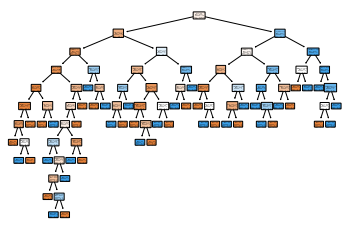

In [88]:
# plt.figure(figsize = (15, 7.5))
plot_tree(clf_dt, rounded = 'True', filled = 'True', class_names = ['No HD', 'Yes HD'], feature_names =X_encoded.columns);

0.76


C:\Users\RuturajMane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


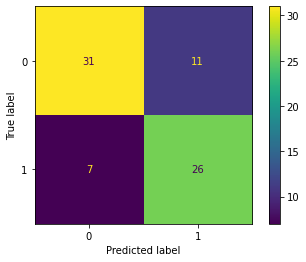

In [89]:
# Plotting confusion matrix display_labels = ["Doesn't have HD", 'Have HD']

plot_confusion_matrix(clf_dt, X_test, Y_test)

print(clf_dt.score(X_test, Y_test)) # Accuracy of the model

In [68]:
# Pruning parameter
path = clf_dt.cost_complexity_pruning_path(X_train,Y_train) # Determine values for alpha for different subtrees
ccp_alphas = path.ccp_alphas # Extract different values for alphas (cost complexity pruning - ccp)
ccp_alphas = ccp_alphas[:-1] # Exclude max value of alphas as max alpha means only root node 

clf_dts = [] # Creating empty array 


# Building the full-scale decision tree from the using above alpha

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt = clf_dt.fit(X_train, Y_train)
    clf_dts.append(clf_dt)



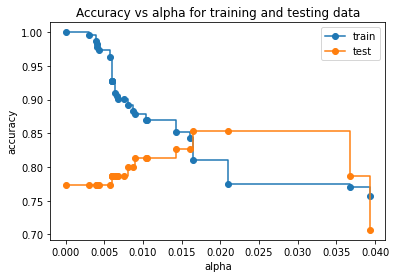

In [62]:
# Finding the accuracy of each tree with different alphas 

train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts] # Returns the list of  mean accuracy 
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts] # Returns the list of mean accuracy

fig, ax = plt.pyplot.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing data')
ax.plot(ccp_alphas, train_scores, marker ='o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker ='o', label = 'test', drawstyle = 'steps-post')
ax.legend()
?clf_dt.score

<AxesSubplot:xlabel='Tree'>

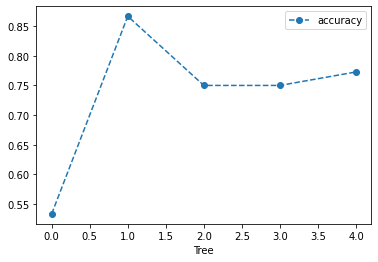

In [65]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016) # create tree with ccp_aplpa = 0.016

# Now we use 5 fold cross valodation to use 5 different training and testing sets
scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
df = pd.DataFrame(data = {'Tree' : range(5), 'accuracy' : scores})

df.plot(x= 'Tree', y= 'accuracy', marker = 'o', linestyle = '--')

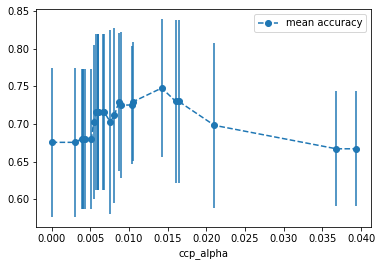

In [93]:
# Create an array to store the results of each fold crossvalidation

alpha_loop_values = []

# For each alpha we will use 5 fold cross validation

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, Y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['ccp_alpha', 'mean accuracy', 'std'])

alpha_results.plot(x = 'ccp_alpha', y = 'mean accuracy', yerr = "std", marker = 'o', linestyle = '--')


In [100]:
ideal_ccp_aplpha = alpha_results[(alpha_results['ccp_alpha'] > 0.014) & (alpha_results['ccp_alpha'] < 0.015)]['ccp_alpha']

In [101]:
ideal_ccp_aplpha = float(ideal_ccp_aplpha)
print(ideal_ccp_aplpha)

0.014224751066856332


In [109]:
# Pruned tree

clf_Pruned_df = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_aplpha)
clf_Pruned_df = clf_Pruned_df.fit(X_train, Y_train)



0.8266666666666667


C:\Users\RuturajMane\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


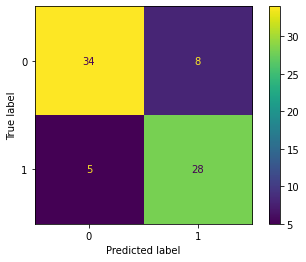

In [111]:
plot_confusion_matrix(clf_Pruned_df, X_test, Y_test)
print(clf_Pruned_df.score(X_test, Y_test))

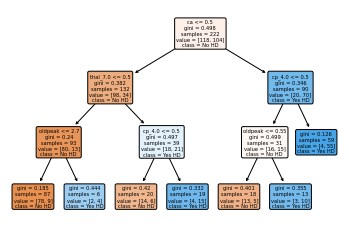

In [112]:
plot_tree(clf_Pruned_df, rounded = 'True', filled = 'True', class_names = ['No HD', 'Yes HD'], feature_names =X_encoded.columns);